In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

import missingno as msno

%matplotlib inline

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


-survival : 생존여부(target label 임)(1,0 으로 표현됨) // integer

-Pclass : 티켓의 클래스 1 = 1st, 2 = 2nd, 3 = 3rd // integer

-sex : 성별(male, female 로 구분됨) // string

-Age : 나이 // continuous integer

-sibSp : 함께 탑승한 형제와 배우자의 수 // quantitative integer

-parch : 함께 탑승한 부모, 아이의 수 // quantitative integer

-ticket : 티켓 번호 // alphabat + integer string

-fare : 탑승료 // continuous float

-cabin : 객실 번호 // alphabat + integer string

-embared : 탑승 항구 // C = Cherbourg, Q = Queenstown, S = Southampton string

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null data check

In [8]:
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
test.isnull().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<AxesSubplot:>

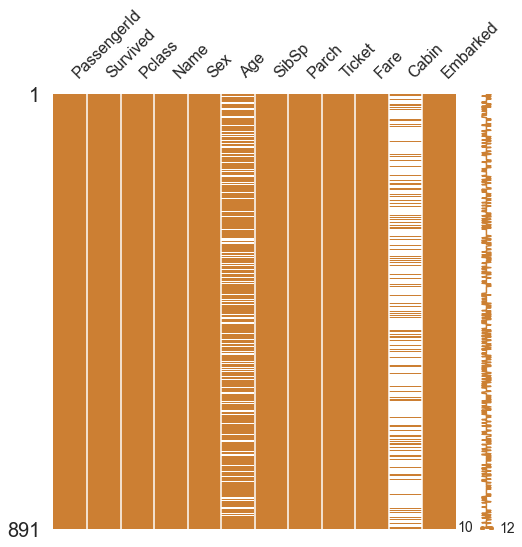

In [10]:
#null 값 시각화
msno.matrix(df=train,figsize=(8,8),color=(0.8,0.5,0.2))

<AxesSubplot:>

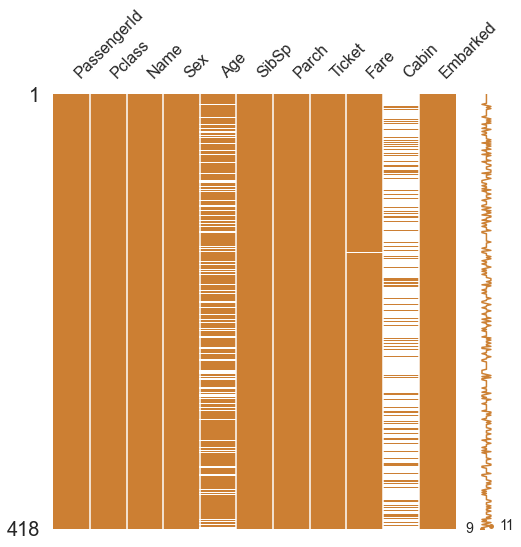

In [11]:
msno.matrix(df=test,figsize=(8,8),color=(0.8,0.5,0.2))

## Target Label 확인
- target label이 어떤 distribution을 가지고 있는지 확인
- 1과 0의 분포가 어떠냐에 따라 모델의 평가방법이 달라짐

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


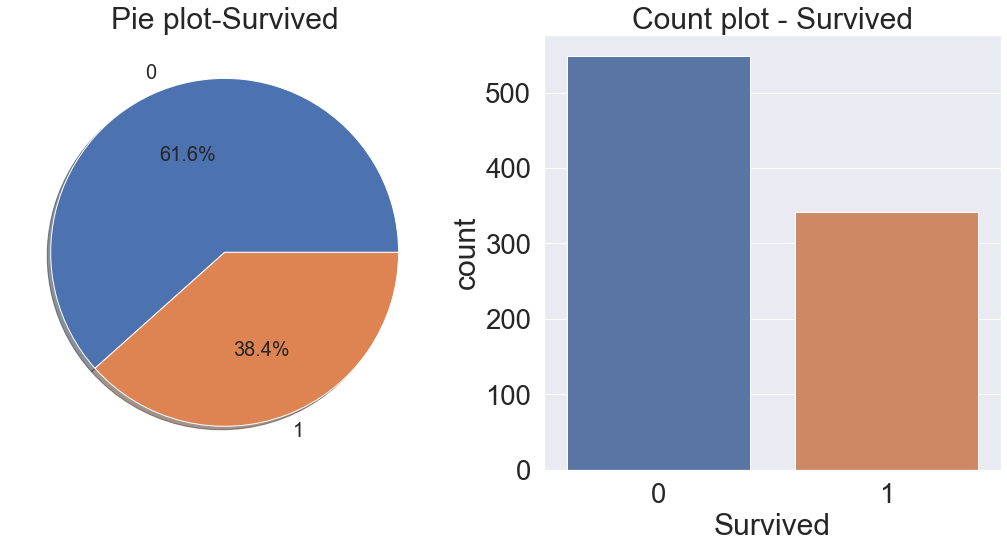

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[0],shadow=True,fontsize=20)
ax[0].set_title('Pie plot-Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


살아남은 사람은 38.4%이다. 

## [EDA] Pclass

In [14]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


class별로 탑승한 사람의 수

In [15]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


class에서 살아남은 사람의 수이다. 0,1로 자료가 나뉘어져 있기 때문에 합치면 1값 밖에 안남기 때문이다

<AxesSubplot:xlabel='Pclass'>

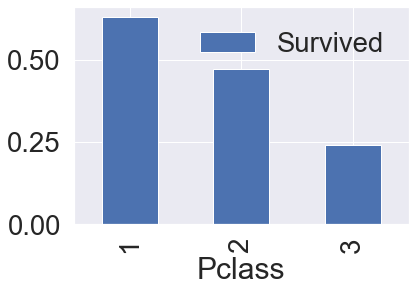

In [16]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()




높은 클래스일수록 생존률이 높다. ascending은 내림차순으로 정리할지 오름차순으로 정리할지 사용하는 것. 

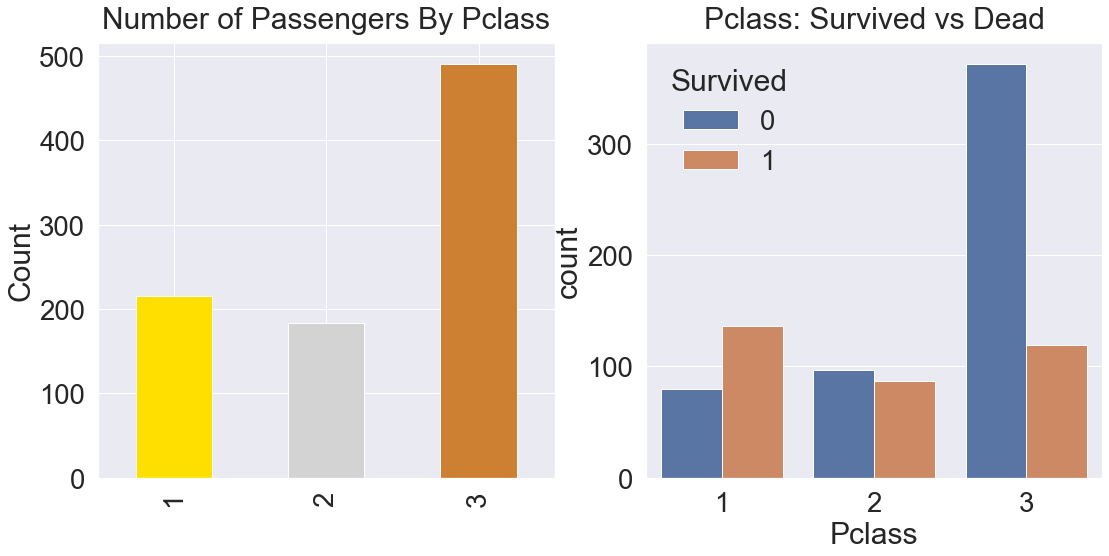

In [17]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## [EDA] Sex

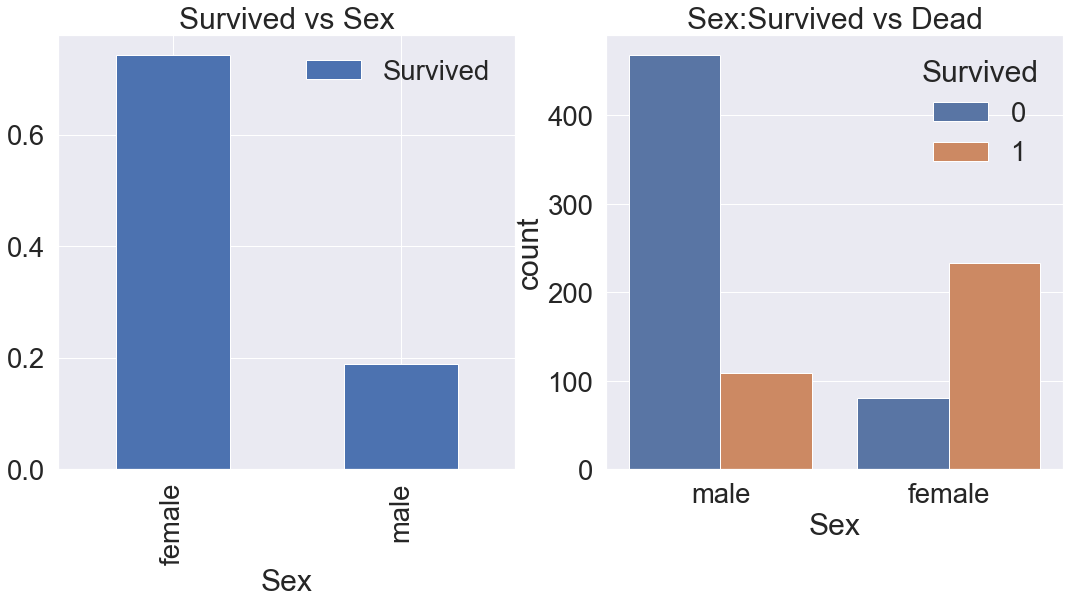

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

성별로 생존률이 어떻게 달라지는 지 확인

In [19]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')



Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지로 Sex도 예측 모델에 쓰일 중요한 feature이다

## [EDA] Both Sex and Pclass

- sex,pclass 두가지에 관해 생존이 어떻게 달라지는지 확인
- seaborn 의 factorplot을 이용하면 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

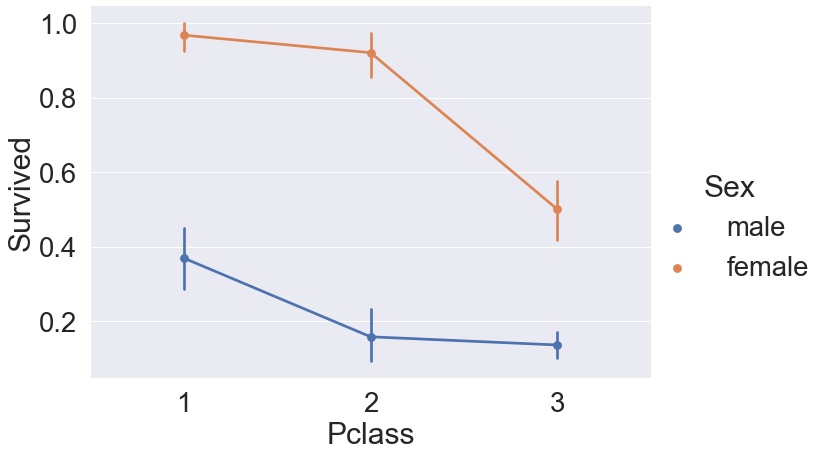

In [21]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train,size=6,aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높다. 
- 또한 남자, 여자 상관 없이 클래스가 높을 수록 살 확률이 높다


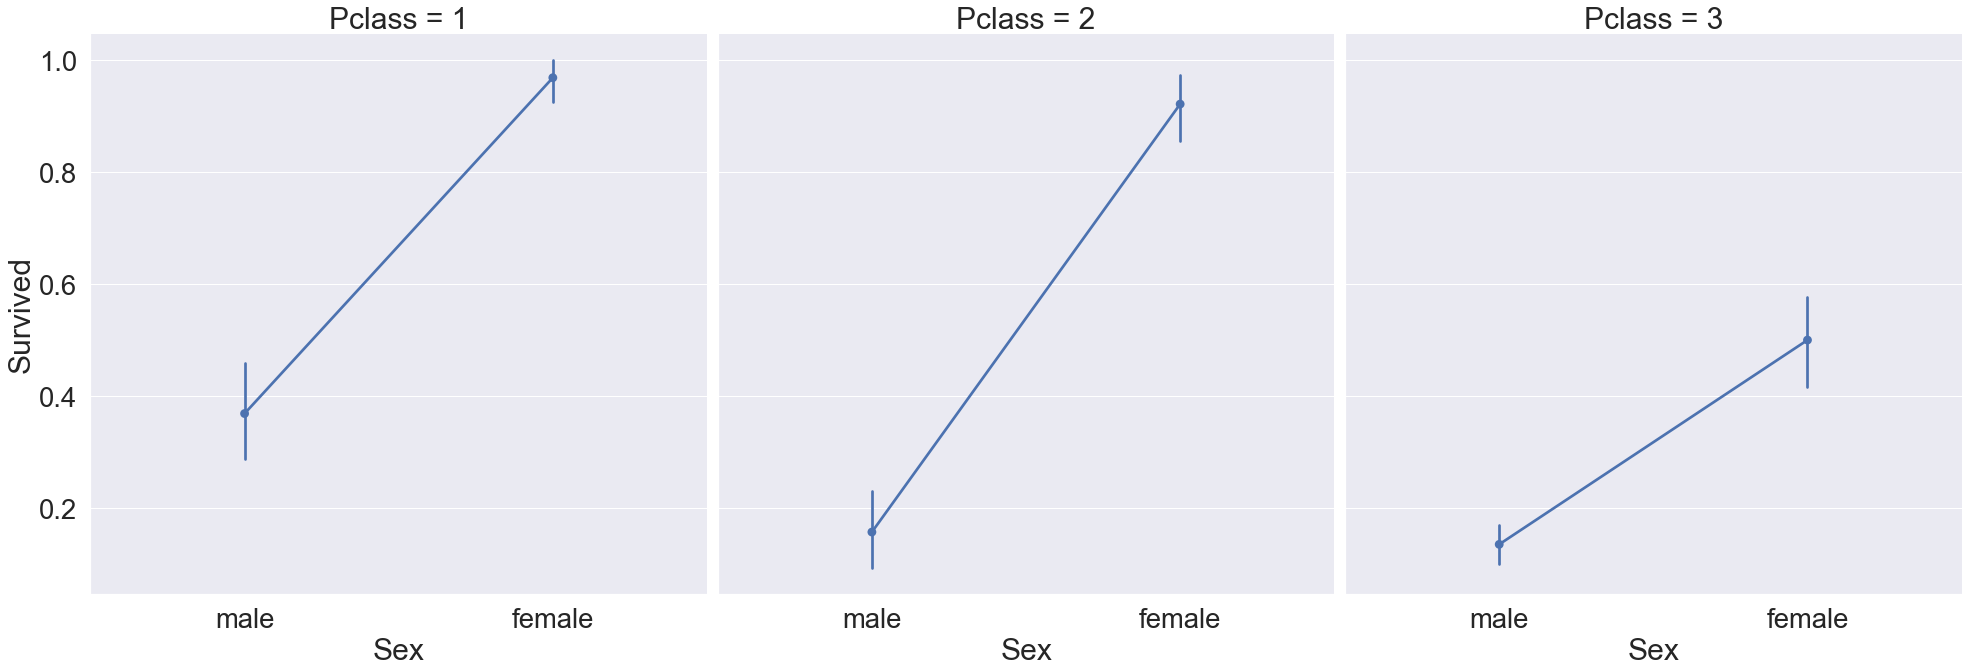

In [22]:
sns.factorplot(x='Sex',y='Survived',col="Pclass",data=train,satureation=.5,size=9,aspect=1)

## [EDA] Age
- 이번에는 Age feature 을 살펴보자

In [23]:
print('제일 나이 많은 탑승객 : ',round(train['Age'].max()))
print('제일 어린 탑승객 : ',round(train['Age'].min()))
print('탑승객 평균 나이 : ',round(train['Age'].mean()))

제일 나이 많은 탑승객 :  80
제일 어린 탑승객 :  0
탑승객 평균 나이 :  30


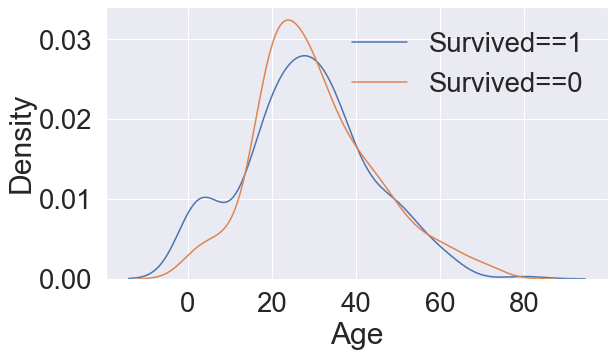

In [26]:
#생존 여부에 따른 age의 histogram을 그려보겠다.
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(train[train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

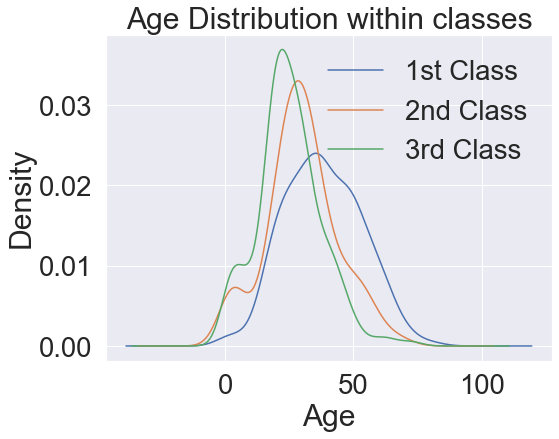

In [29]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

#class가 높을 수록 나이 많은 사람의 비중이 커짐
#나이대가 변하면서 생존률이 어떻게 되는지 보려고 한다.
#나이 범위를 점점 넓혀가며 생존률이 어떻게 되는지 한번 본다

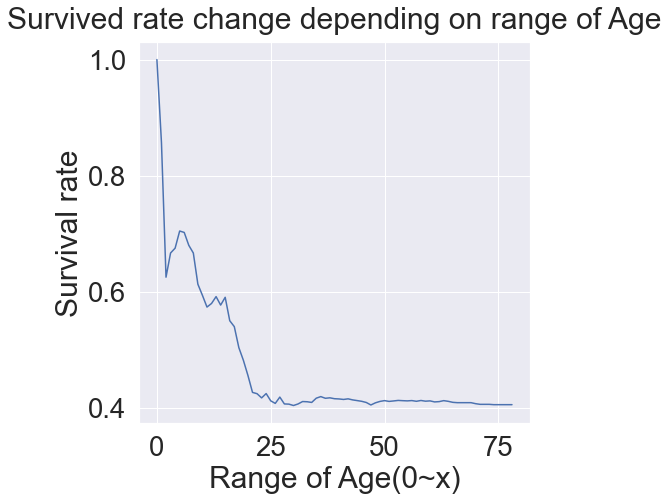

In [34]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(train[train['Age']<i]['Survived'].sum()/len(train[train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survived rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

보다시피 나이가 어릴 수록 생존률이 확실히 높은 것을 확인 가능, 
나이가 중요한 feature로 쓰일 수 있음을 확인했다

In [35]:
train.groupby(['Embarked','Pclass'])['Fare'].median()

Embarked  Pclass
C         1         78.2667
          2         24.0000
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         13.5000
          3          8.0500
Name: Fare, dtype: float64

### [EDA] Pclass,Sex,Age
- 지금까지 본 sex,pclass,age,survivied 모두에 대해 보려고 한다. 이것을 쉽게 그려주는 것이 seaborn의 violinplot이다.
- x축은 우리가 나눠서 보고싶어하는 case를 나타내고 y축은 보고 싶어하는 distribution이다. 

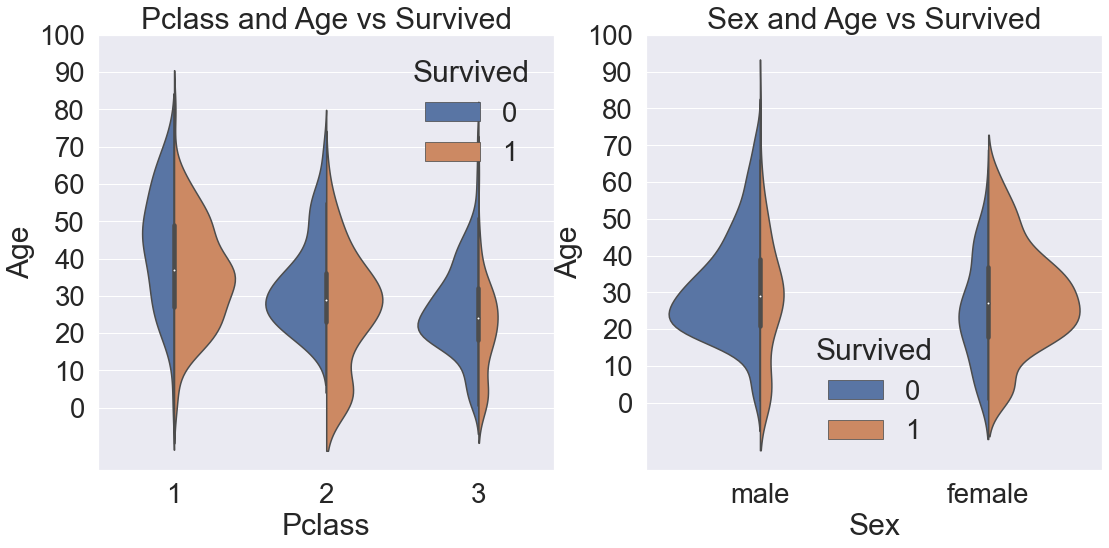

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#pclass-age간 생존 여무
sns.violinplot('Pclass','Age',hue='Survived',data=train,scale="count",split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#sex-age 간 생존여부
sns.violinplot("Sex","Age",hue="Survived",data=train,scale="count",split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있다. 
#여자가 더 많이 생존함
#여성과 아이를 먼저 살림


## [EDA] Embarked
- Embarked 는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보겠습니다

<AxesSubplot:xlabel='Embarked'>

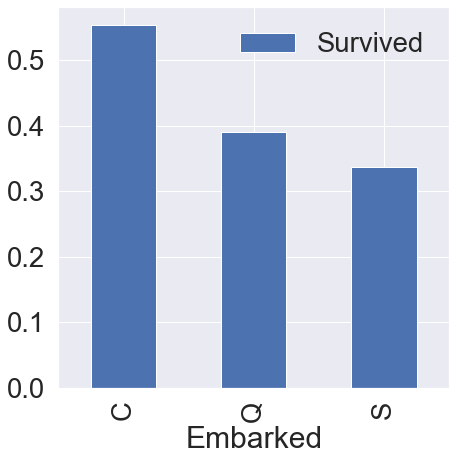

In [39]:
f,ax=plt.subplots(1,1,figsize=(7,7))
train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)





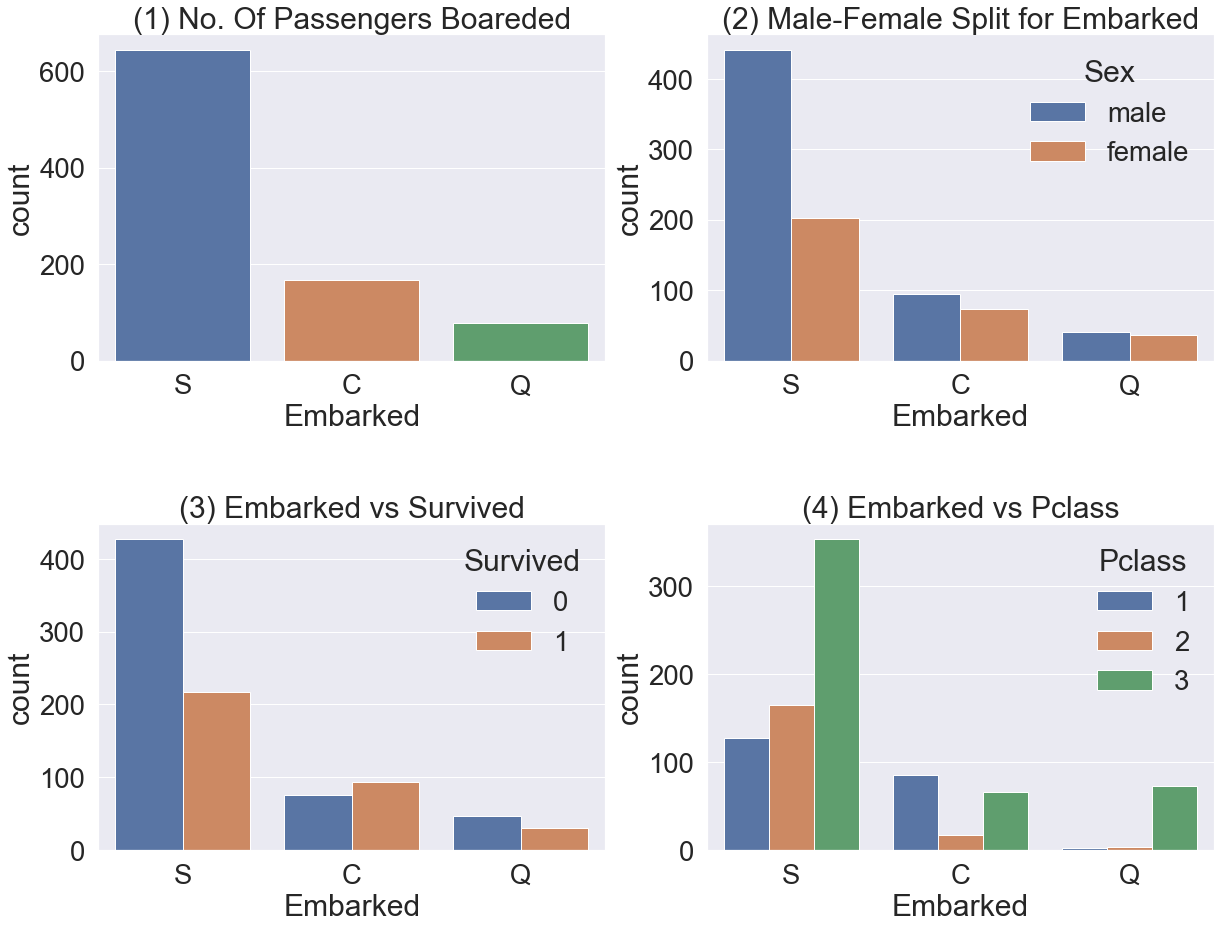

In [45]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boareded')

sns.countplot('Embarked',hue="Sex",data=train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue="Pclass",data=train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
test.loc[test.Fare.isnull(),'Fare']=test['Fare'].mean()
#testset에 있는 nanvalue를 평균값으로 치환

In [51]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [52]:
print(train['Fare'].min(),test['Fare'].min())

0.0 0.0


In [53]:
train['Fare'] = np.log1p(train['Fare'])
test['Fare'] = np.log1p(test['Fare'])
# 로그변환을 해줍니다.

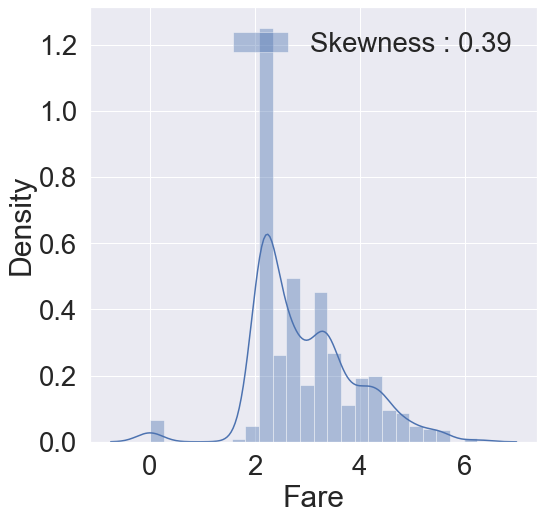

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
# log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
# 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.

## Cabin
- 이 feature은 NaN이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.
- 그러므로 우리가 세우려는 모델에 포함시키지 않겠다

In [56]:
train.isnull().sum() / len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [57]:
train = train.drop(['Cabin'],1)
test = test.drop(['Cabin'],1)

In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,S


In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


## [EDA] Ticket
- 이 feature은 NaN은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데 이를 위해서는 아이디어가 필요하다.

In [60]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [63]:
train['Ticket'].value_counts() #ticket이 종류별로 얼마나 있는지 확인하기 위함

CA. 2343             7
347082               7
1601                 7
CA 2144              6
3101295              6
                    ..
A/5 2817             1
364498               1
2649                 1
STON/O 2. 3101292    1
14312                1
Name: Ticket, Length: 681, dtype: int64

# Fill Null in Age using title

In [64]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Age 에는 null data가 177개나 있다

In [67]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [68]:
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mrs'

In [70]:
train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
#모두 적용

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [71]:
train['Initial'] = train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [72]:
test['Initial'] = test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [73]:
train['Initial'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
the Countess      1
Mme               1
Sir               1
Jonkheer          1
Don               1
Lady              1
Capt              1
Name: Initial, dtype: int64

In [75]:
train.groupby(['Sex', 'Initial'])['Initial'].count()
#성별별 initial을 보면 알수없는 것들이 많다. 이걸 아는 것들로 바꿔보자(Mr, Mrs)

Sex     Initial     
female  Dr                1
        Lady              1
        Miss            182
        Mlle              2
        Mme               1
        Mrs             125
        Ms                1
        the Countess      1
male    Capt              1
        Col               2
        Don               1
        Dr                6
        Jonkheer          1
        Major             2
        Master           40
        Mr              517
        Rev               6
        Sir               1
Name: Initial, dtype: int64

In [76]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,2.185579,S,Mr
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,2.443798,S,Miss
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,2.442347,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,2.085672,S,Mr
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,3.405355,Q,Mrs
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.196630,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,2.169054,Q,Mr


In [77]:
train['Initial'] = train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'])
test['Initial'] = test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                                          ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'])

In [78]:
train.groupby(['Sex','Initial'])['Initial'].count()

Sex     Initial
female  Miss       186
        Mr           1
        Mrs        127
male    Master      40
        Mr         528
        Other        9
Name: Initial, dtype: int64

In [80]:
train.loc[(train['Age'].isnull())&(train['Initial']=='Mr'),'Age'] = 33
train.loc[(train['Age'].isnull())&(train['Initial']=='Mrs'),'Age'] = 36
train.loc[(train['Age'].isnull())&(train['Initial']=='Master'),'Age'] = 5
train.loc[(train['Age'].isnull())&(train['Initial']=='Miss'),'Age'] = 22
train.loc[(train['Age'].isnull())&(train['Initial']=='Other'),'Age'] = 46

test.loc[(test['Age'].isnull())&(test['Initial']=='Mr'),'Age'] = 33
test.loc[(test['Age'].isnull())&(test['Initial']=='Mrs'),'Age'] = 36
test.loc[(test['Age'].isnull())&(test['Initial']=='Master'),'Age'] = 5
test.loc[(test['Age'].isnull())&(test['Initial']=='Miss'),'Age'] = 22
test.loc[(test['Age'].isnull())&(test['Initial']=='Other'),'Age'] = 46
#이게 뭐하는건지 이해가 잘 안가서 설명을 그대로 가져왔다;;
#---------------------------------------------------------------------
# 위에 코드는 조금 어려워 보일 수 있습니다. 하지만 한개씩 해석해보도록 합시다.
# 각 스탭별로 코드들을 따라치면서 확인해보셔야 합니다

#=== 1STEP ===#
# 우선 train['Age'].isnull() 를 쳐보시면 Age의 Null 값만 True가 됩니다.
# train['Initial']=='Mr' 은 Train의 Initial이 Mr인 경우만 True가 됩니다.
# 위에 두개가 동시에 충족되는 경우만 True가 되려고 (train['Age'].isnull())&(train['Initial']=='Mr') 로 작성했습니다(중간에 And(&) 확인)

#=== 2STEP ===#
# train.loc[A,'B']는 Train의 A 행과 B열에 속하는 값을 찾아줍니다.
# 앞에서 Step으로 찾은 Index들을 Row로, 우리가 찾고자 하는 Age를 열로 지정해줍니다.
# --> train.loc[(train['Age'].isnull())&(train['Initial']=='Mr'),'Age']

#=== 3STEP ===#
# 뒤에 '= 33' 로 되어있는 것은 앞에 표시한 값(loc에서 찾은 값)들을 33으로 치환하라는 의미입니다.

## Fill Null in Embarked

In [81]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Initial        0
dtype: int64

In [82]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Initial        0
dtype: int64

In [83]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
train['Embarked'] = train['Embarked'].fillna('S')

In [85]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Initial        0
dtype: int64

## Change Initial, Embarked and Sex (string to numerical)

In [86]:
train['Sex'] = train['Sex'].replace(['male','female'],[0,1])
test['Sex'] = test['Sex'].replace(['male','female'],[0,1])

In [88]:
train['Sex'] = train['Sex'].astype('category')
test['Sex'] = test['Sex'].astype('category')
# Intiger가 아니므로, Category로 Type 변경

In [89]:
train = pd.get_dummies(train, columns = ['Embarked'], prefix = 'Embarked')
test = pd.get_dummies(test, columns = ['Embarked'], prefix = 'Embarked')
print(train.shape, test.shape)
# Embarked는 One Hot Encoding을 해보도록 하죠, Prefix를 Embarked로 정해서 실행시켜봅니다.
# Train, Test 모두 잘되었는지 shape를 활용해 꼭 확인해보세요

(891, 14) (418, 13)


## Target Encoding

In [90]:
train_initial_groupby = train.groupby(['Initial'])['Survived'].mean().to_dict()
train_initial_groupby

# Target Encoding은 해당 Column과 y값과의 관계로 Encoding 하는 방법
# 우리는 Initial과 Survived가 관계가 있다고 생각하고, 두 값을 Pivotting 해봅시다.
# Pivotting한 값을 mapping 시키기위해 to_dict()함수를 사용합니다.

{'Master': 0.575,
 'Miss': 0.7043010752688172,
 'Mr': 0.16257088846880907,
 'Mrs': 0.7952755905511811,
 'Other': 0.1111111111111111}

In [92]:
train['Initial_mean'] = train['Initial'].map(train_initial_groupby)
test['Initial_mean'] = test['Initial'].map(train_initial_groupby)
# 위에서 to_dict한 값들을 train_initial_groupby로 집어넣었는데, 이걸 Map 함수를 활용해 바꿔줍니다.

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Initial,Embarked_C,Embarked_Q,Embarked_S,Initial_mean
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,Mr,0,0,1,0.162571
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,Mrs,1,0,0,0.795276
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,Miss,0,0,1,0.704301
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,Mrs,0,0,1,0.795276
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,Mr,0,0,1,0.162571


In [94]:
train_initial_groupby = train.groupby(['Initial'])['Survived'].std().to_dict()
train_initial_groupby
#Target Encoding을 std(표준편차)를 가지고 해봅시다

{'Master': 0.5006406152531231,
 'Miss': 0.4575880310508566,
 'Mr': 0.36932294624164763,
 'Mrs': 0.40509812013774216,
 'Other': 0.33333333333333337}

In [95]:
train['Initial_std'] = train['Initial'].map(train_initial_groupby)
test['Initial_std'] = test['Initial'].map(train_initial_groupby)

In [96]:
train = train.drop(['Initial'],1)
test = test.drop(['Initial'],1)

In [97]:
train.shape, test.shape

((891, 15), (418, 14))

In [98]:
train = train.drop(['Name', 'Ticket'],1)
test = test.drop(['Name', 'Ticket'],1)

In [99]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Initial_mean,Initial_std
0,1,0,3,0,22.0,1,0,2.110213,0,0,1,0.162571,0.369323
1,2,1,1,1,38.0,1,0,4.280593,1,0,0,0.795276,0.405098
2,3,1,3,1,26.0,0,0,2.188856,0,0,1,0.704301,0.457588
3,4,1,1,1,35.0,1,0,3.990834,0,0,1,0.795276,0.405098
4,5,0,3,0,35.0,0,0,2.202765,0,0,1,0.162571,0.369323


In [100]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Initial_mean,Initial_std
0,892,3,0,34.5,0,0,2.178064,0,1,0,0.162571,0.369323
1,893,3,1,47.0,1,0,2.079442,0,0,1,0.795276,0.405098
2,894,2,0,62.0,0,0,2.369075,0,1,0,0.162571,0.369323
3,895,3,0,27.0,0,0,2.268252,0,0,1,0.162571,0.369323
4,896,3,1,22.0,1,1,2.586824,0,0,1,0.795276,0.405098


## Data Spilting

In [101]:
y = train['Survived']
X = train.drop(['Survived'],1)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 30, test_size = 0.2)

In [103]:
print(X_train.shape, y_train.shape, X_valid.shape,  y_valid.shape)

(712, 12) (712,) (179, 12) (179,)


## Model generation and prediction

In [104]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [105]:
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
print('train_score : ', (pred_train == y_train).mean())
pred_valid = model.predict(X_valid)
print('valid_score : ', (pred_valid == y_valid).mean())

train_score :  1.0
valid_score :  0.7318435754189944
